### 1. Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.io import mmread
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn .model_selection import learning_curve
from collections import Counter
import pickle
import gzip
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

### 2. Loading a data

In [2]:
diabetes_data = pd.read_csv('full_dataset.csv')
diabetes_data.head(5)

,Age,Pregnancy,BMI,HbA1c,Chol,FBS,RBS,BP,CLASS
0,64,0,25.7,7.22,250,229,238,147,1
1,52,0,27.3,7.67,256,218,298,164,1
2,63,0,25.9,8.99,223,175,339,149,1
3,58,0,30.2,8.27,246,202,236,132,1
4,51,0,28.1,7.00,239,177,334,146,1


#### 2.1. Checking the shape of the dataset

In [3]:
print('Diabetes data shape: ', diabetes_data.shape)

Diabetes data shape:  (10655, 9)


In [5]:
diabetes_data.groupby('CLASS').size()

CLASS
1    2660
2    2661
3    2672
4    2662
dtype: int64

In [6]:
### Replacing the class indeces
classidx = {
    1:'Type II',
    2:'PreDiabet',
    3:'Gestational',
    4:'Normal'
}

In [7]:
idxclass = {v: k for k, v in classidx.items()}
diabetes_data['CLASS'].replace(classidx, inplace=True)

In [8]:
### Displaying the replaced categories
diabetes_data['CLASS'].unique()

array(['Type II', 'PreDiabet', 'Gestational', 'Normal'], dtype=object)

Text(0, 0.5, 'Number of data')

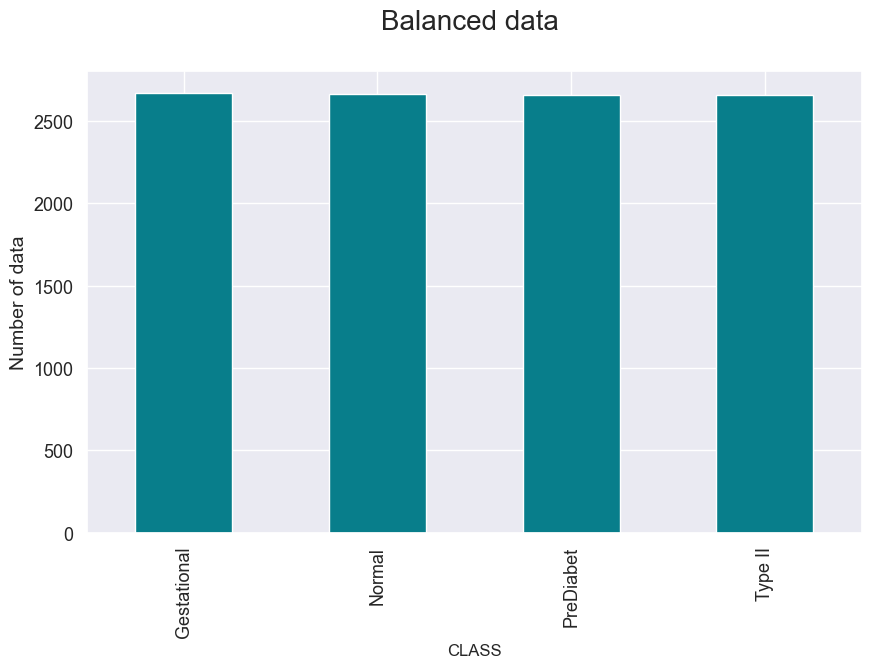

In [9]:
### Ploting the graph
ax = diabetes_data['CLASS'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Balanced data ', size=20, pad=30)
ax.set_ylabel('Number of data', fontsize=14)

### 3. Preprocessing the data

In [10]:
# checking for the null values of the datasets
diabetes_data.isnull().sum()

Age          0
Pregnancy    0
BMI          5
HbA1c        0
Chol         0
FBS          0
RBS          0
BP           0
CLASS        0
dtype: int64

In [11]:
### Filling the missing column(BMI)  by calculating the mean of the entire column
updated_diabetes_data = diabetes_data
updated_diabetes_data['BMI'] = updated_diabetes_data['BMI'].fillna(updated_diabetes_data['BMI'].mean())
updated_diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655 entries, 0 to 10654
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        10655 non-null  int64  
 1   Pregnancy  10655 non-null  int64  
 2   BMI        10655 non-null  float64
 3   HbA1c      10655 non-null  float64
 4   Chol       10655 non-null  int64  
 5   FBS        10655 non-null  int64  
 6   RBS        10655 non-null  int64  
 7   BP         10655 non-null  int64  
 8   CLASS      10655 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 749.3+ KB


In [12]:
# checking for the null values of the datasets
diabetes_data.isnull().sum()

Age          0
Pregnancy    0
BMI          0
HbA1c        0
Chol         0
FBS          0
RBS          0
BP           0
CLASS        0
dtype: int64

### 4. Spliting the dataset

In [13]:
### Replacing the calss names with integer
classidx = {
    'Type II':1,
   'PreDiabet':2,
   'Gestational':3,
   'Normal':4
}
idxclass = {v: k for k, v in classidx.items()}
diabetes_data['CLASS'].replace(classidx, inplace=True)
diabetes_data['CLASS'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
X = diabetes_data.drop('CLASS', axis = 1)
y = diabetes_data.CLASS
print(X)

       Age  Pregnancy   BMI  HbA1c  Chol  FBS  RBS   BP
0       64          0  25.7   7.22   250  229  238  147
1       52          0  27.3   7.67   256  218  298  164
2       63          0  25.9   8.99   223  175  339  149
3       58          0  30.2   8.27   246  202  236  132
4       51          0  28.1   7.00   239  177  334  146
...    ...        ...   ...    ...   ...  ...  ...  ...
10650   48          0  21.3   5.20   185   79  113  117
10651   43          0  19.1   4.10   188   85   86  108
10652   40          0  21.3   4.80   126   84  119  112
10653   43          0  21.8   5.00   192   71  110  102
10654   41          0  25.0   4.10   141   82  111  118

[10655 rows x 8 columns]


In [15]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10650    4
10651    4
10652    4
10653    4
10654    4
Name: CLASS, Length: 10655, dtype: int64


In [16]:
## Importing train_test_split method from sklearn
from sklearn.model_selection import train_test_split

### Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# creating train/validation split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Feature scaling, specifically using the StandardScaler from scikit-learn, a popular Python library for machine learning. Feature scaling is a preprocessing technique that is commonly used in machine learning to standardize or normalize the features (input variables) of a dataset. Here's a breakdown of what the code is doing:

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 5. Building a model

##### 5.1. SVM Model

In [18]:
### Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
random = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
random.fit(X_train, y_train)
print(random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.999 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.998 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.999 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.999 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.999 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.999 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;

In [19]:
# print best parameter after tuning
best_params = random.best_params_
best_estimator = random.best_estimator_

print(random.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(random.best_estimator_)

{'kernel': 'rbf', 'gamma': 1, 'C': 100}
SVC(C=100, gamma=1)


In [20]:
### Evaluate the best estimator on the test data:
test_accuracy = best_estimator.score(X_test, y_test)
test_accuracy

1.0

In [21]:
### Training the model
model=[]
acc=[]
svclassifier = SVC(C=10, gamma=0.0001, kernel='rbf')
svclassifier.fit(X_train, y_train)

### kfold = KFold(n_splits=10, random_state=0, shuffle=True)
### result = cross_val_score(svclassifier, X, y, cv=kfold, scoring='accuracy')

SVC(C=10, gamma=0.0001)

In [22]:
### Saving the Model
import joblib

# Save the trained model to a file
joblib.dump(svclassifier, 'SVM_trained_model.pkl')

['SVM_trained_model.pkl']

In [23]:
### Evaluating the model
y_pred = svclassifier.predict(X_test)

print(accuracy_score(y_test, y_pred)*100)
target_names = ['Type II', 'PreDiabet', 'Gestational', 'Normal']
print(classification_report(y_pred, y_test, target_names=target_names))
model.append("svm")

99.3899577663069
              precision    recall  f1-score   support

     Type II       0.98      1.00      0.99       515
   PreDiabet       1.00      0.98      0.99       555
 Gestational       1.00      1.00      1.00       513
      Normal       1.00      1.00      1.00       548

    accuracy                           0.99      2131
   macro avg       0.99      0.99      0.99      2131
weighted avg       0.99      0.99      0.99      2131



Confusion Matrix:
[[515   0   0   0]
 [ 11 543   0   1]
 [  0   0 513   0]
 [  1   0   0 547]]


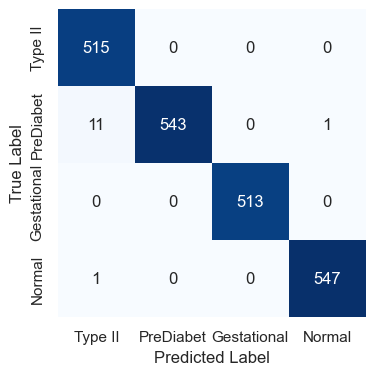

In [24]:
### Displaying the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)

# Define class labels
target_names = ['Type II', 'PreDiabet', 'Gestational', 'Normal']
plt.figure(figsize=(4, 4))

sns.heatmap(cm, square=True, annot=True, xticklabels=target_names, yticklabels=target_names, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print("Confusion Matrix:")
print(cm)

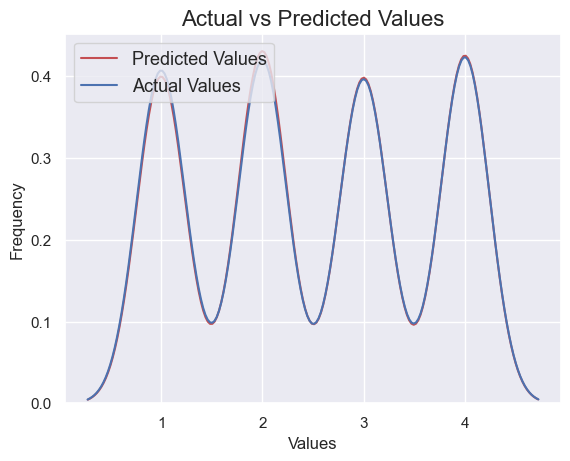

In [25]:
### creating a distribution plot to visualize and compare the distribution of predicted values
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
sb.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [26]:
### generate learning curves for a Support Vector Classifier (SVC) model
train_sizes, train_scores, test_scores=learning_curve(SVC(),X_train,  y_train, scoring ='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01,1, 50), verbose =1 )

[learning_curve] Training set sizes: [  61  185  309  433  557  681  805  929 1053 1177 1301 1425 1549 1672
 1796 1920 2044 2168 2292 2416 2540 2664 2788 2912 3036 3160 3284 3408
 3532 3656 3780 3904 4028 4152 4276 4400 4524 4648 4772 4896 5020 5144
 5268 5392 5516 5640 5764 5888 6012 6136]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.1s finished


In [27]:
### calculates the mean of the training scores obtained from a learning curve analysis
train_mean = np.mean(train_scores, axis =1)
train_mean

array([1.        , 0.99567568, 1.        , 0.99953811, 0.99964093,
       0.99970631, 0.99975155, 0.99956943, 0.99981007, 0.99983008,
       0.99984627, 0.99985965, 0.99987088, 1.        , 1.        ,
       1.        , 1.        , 0.99972325, 0.99973822, 0.99966887,
       0.99976378, 0.99977477, 0.99964132, 0.99965659, 0.99967062,
       0.99968354, 0.99975639, 0.99976526, 1.        , 1.        ,
       0.99984127, 0.99974385, 0.99965243, 0.99966281, 0.99957905,
       0.99959091, 0.99955791, 0.9996988 , 0.99970662, 0.9996732 ,
       0.99976096, 0.99976672, 0.99977221, 0.99974036, 0.99974619,
       0.99975177, 0.99972241, 0.99976223, 0.99976713, 0.99973924])

In [28]:
### calculates the mean of the testing scores obtained from a learning curve analysis
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.94631676, 0.99804458, 0.99882694, 0.9992179 , 0.99947849,
       0.99934819, 0.99921782, 0.99947849, 0.99947849, 0.99947849,
       0.99934811, 0.99934811, 0.99934811, 0.99934811, 0.99934811,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887,
       0.99960887, 0.99960887, 0.99960887, 0.99960887, 0.99960887])

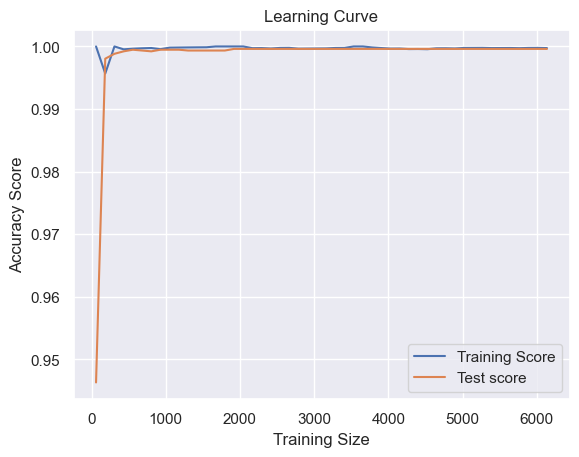

In [29]:
### Plotting the training score and testing score
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean,label = 'Test score')
#plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= '#DDDDDD')
#plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= '#DDDDDD')

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc = 'best')

In [32]:
### Evaluating the Model using unseen data

# Load the trained model from the file
loaded_model = joblib.load('SVM_trained_model.pkl')

# Define new data points for prediction
new_data = [[64, 0, 25.7, 7.22, 250, 229, 238, 147]]

# Make predictions using the loaded model
prediction1 = loaded_model.predict(new_data)

# Print the predictions
print("Prediction 1:", prediction1)


Prediction 1: [1]


##### 2. Naïve Bayes Model

In [33]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

Pred = gnb.predict(X_test)

print(accuracy_score(y_test, Pred)*100)
result = (accuracy_score(y_test, Pred)*100)
target_names = ['Type II', 'PreDiabet', 'Gestational', 'Normal']
print(classification_report(Pred, y_test, target_names=target_names))
model.append("GaussianNB")
acc.append(result)

99.8122946973252
              precision    recall  f1-score   support

     Type II       0.99      1.00      1.00       523
   PreDiabet       1.00      0.99      1.00       546
 Gestational       1.00      1.00      1.00       513
      Normal       1.00      1.00      1.00       549

    accuracy                           1.00      2131
   macro avg       1.00      1.00      1.00      2131
weighted avg       1.00      1.00      1.00      2131



In [35]:
### Saving the model
# Save the trained model to a file
joblib.dump(gnb, 'Naive_Bayes_trained_model.pkl')

['Naive_Bayes_trained_model.pkl']

Confusion Matrix:
[[523   0   0   0]
 [  3 543   0   0]
 [  0   0 513   0]
 [  1   0   0 548]]


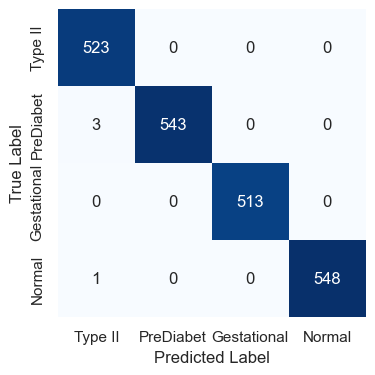

In [37]:
### testing 
y_pred = gnb.predict(X_test)

# Calculate the confusion matrix

cm = confusion_matrix(y_pred, y_test)

# Define class labels
target_names = ['Type II', 'PreDiabet', 'Gestational', 'Normal']
plt.figure(figsize=(4, 4))

sns.heatmap(cm, square=True, annot=True, xticklabels=target_names, yticklabels=target_names, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print("Confusion Matrix:")
print(cm)

In [39]:
### Evaluating the Model using unseen data

# Load the trained model from the file
loaded_model1 = joblib.load('Naive_Bayes_trained_model.pkl')

# Define new data points for prediction
new_data1 = [[40, 1, 21.8, 4.3, 127, 91, 121, 111]]

# Make predictions using the loaded model
prediction2 = loaded_model1.predict(new_data1)

# Print the predictions
print("Prediction 1:", prediction2)

Prediction 1: [3]
